In [23]:
#Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading the final data after transformation

unemployment_data = pd.read_csv("unemployment_data.csv",index_col = [0])

In [3]:
unemployment_data.head()

,State,Non-Workers - PersonsGraduate and above other than Technical Degree,Non-Workers - PersonsIlliterate,Non-Workers - PersonsLiterate,Non-Workers - PersonsLiterate but below Matric/Secondary,Non-Workers - PersonsMatric/Secondary but below Graduate,Non-Workers - PersonsTechnical Degree or Diploma equal to Degree or Post-Graduate Degree,Non-Workers - PersonsTechnical Diploma or Certificate not equal to Degree,Non-Workers - PersonsTotal,Non-Workers - MalesGraduate and above other than Technical Degree,...,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total,%ageofPersons (Total),No.ofPersons(lakhs) (Total)
0,Andaman & Nicobar Islands,6333,67178,160868,108094,40370,1150,1513,228046,1398,...,10,0,0,0,1,0,1,11,1.00,0.04
1,Andhra Pradesh,1684053,16961578,28196293,16291298,7813178,702312,282912,45157871,685788,...,535,0,59,30,14,4,107,642,9.20,78.78
2,Arunachal Pradesh,13537,355609,440461,322414,92214,1981,1231,796070,6230,...,7,1,2,0,0,0,3,10,34.67,4.91
3,Assam,333647,8166257,11069629,8281329,2002325,23865,13259,19235886,118601,...,48,0,6,5,0,0,11,59,31.98,101.27
4,Bihar,1071449,35779912,33594553,24928665,5853059,112005,17767,69374465,563409,...,49,0,5,2,0,0,7,56,33.74,358.15


The suicide data for unemployed men and women is classified into different age groups. The focus for the first part of this research question is to identify the more suicidal gender out of the two.

We have the numbers for suicide victims state wise, it'd be important to look at the male and female suicide count for the entire year 2011.

In [4]:
male_count = unemployment_data["Total Male"].sum()
male_count

8577

In [5]:
female_count = unemployment_data["Total Female"].sum()
female_count

1842

The suicide counts for both genders are poles apart. The number of men who committed suicide are around 4.6 times more than the women who lost their lives. Hence men were more suicidal in 2011 as compared to women.

It'd be helpful to look at the distribution of these numbers.

Text(0.5, 49.99999999999995, 'Unemployed men suicide victims')

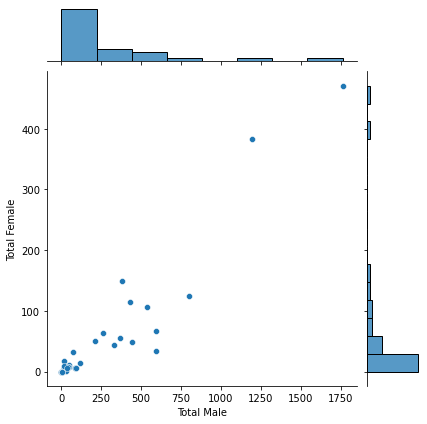

In [33]:
sns.jointplot(data = unemployment_data, x="Total Male", y="Total Female")

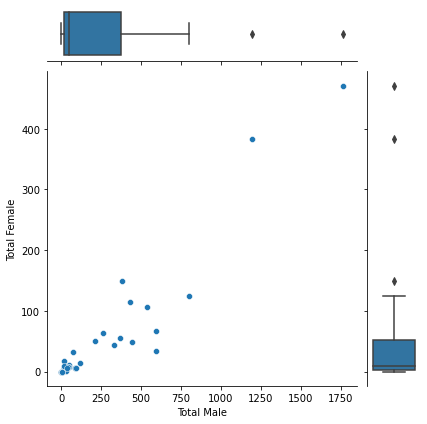

In [34]:
g = sns.JointGrid(data=unemployment_data, 
                  x="Total Male",
                  y="Total Female")

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxplot)
plt.savefig("Scatterplot_with_marginal_boxplot_Seaborn.png",
                    format='png',dpi=150)

In [8]:
Q1 =  unemployment_data['Total Male'].quantile(0.25)
Q3 = unemployment_data['Total Male'].quantile(0.75)
IQR = Q3- Q1

In [9]:
unemployment_data[(unemployment_data['Total Male'] < Q1-1.5*IQR ) | (unemployment_data['Total Male'] > Q3+1.5*IQR)]['State']

30      Tamil Nadu
34     West Bengal
Name: State, dtype: object

Tamil Nadu and West Bengal witnessed the most number of unemployed men losing their lives.

Apparently, three states had very few unusual female suicide victims as compared to the majority of states.

In [12]:
Q1 =  unemployment_data['Total Female'].quantile(0.25)
Q3 = unemployment_data['Total Female'].quantile(0.75)
IQR = Q3- Q1

In [14]:
unemployment_data[(unemployment_data['Total Female'] < Q1-1.5*IQR ) | (unemployment_data['Total Female'] > Q3+1.5*IQR)]['State']

25          Odisha
30      Tamil Nadu
34     West Bengal
Name: State, dtype: object

Surprisingly, 2 of out these 3 states had similar trend for the male suicide victims as well. Apart from that, as it turns out Odisha witnessed exceptionally high women suicide count too.

It has been concluded that the numbers for men look quite intense than women. But, we are inquistive to find out for which all and how many regions does this hold true for.

In [15]:
comparison_column = np.where(unemployment_data["Total Male"] > unemployment_data["Total Female"], True, False)
unemployment_data["greater"] = comparison_column

In [16]:
df = unemployment_data[(unemployment_data["greater"] == True)]
df[["State","Total Male","Total Female"]]

,State,Total Male,Total Female
0,Andaman & Nicobar Islands,10,1
1,Andhra Pradesh,535,107
2,Arunachal Pradesh,7,3
3,Assam,48,11
4,Bihar,49,7
5,Chandigarh,10,2
6,Chhattisgarh,592,34
9,Goa,370,55
10,Gujarat,43,8
11,Haryana,443,48


In [17]:
df.shape

(31, 74)

To conclude, in 31 out of 35 Indian regions, men committed more suicides than women. Even for the rest of the regions, the suicide count for women was same as that of men. So, men for sure were more suicidal than women back in 2011.

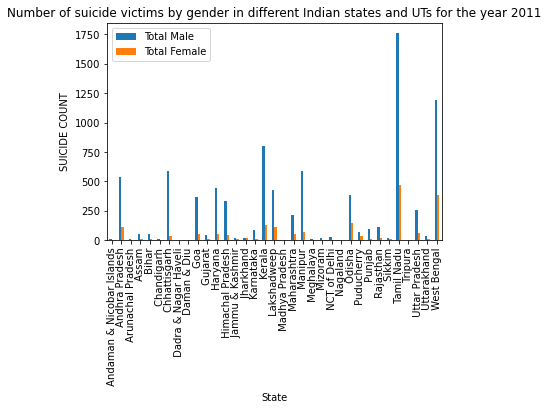

In [18]:
#Visualizing suicide counts for both genders region wise.

#Looking at suicide numbers for all states and Union territories individually

unemployment_data.plot(x ='State', y=['Total Male','Total Female'], kind = 'bar')
plt.ylabel("SUICIDE COUNT")
plt.title("Number of suicide victims by gender in different Indian states and UTs for the year 2011")
plt.show()



The above made conclusion has been backed up by the plot above.

Next part of this analysis question to understand suicide numbers for different age groups.

In [38]:
upto_14_years = unemployment_data["Male upto 14 years"].sum() + unemployment_data["Female upto 14 years"].sum()
between_15_29 = unemployment_data["Male 15-29 years"].sum() + unemployment_data["Female 15-29 years"].sum()
between_30_44 = unemployment_data["Male 30-44 years"].sum() + unemployment_data["Female 30-44 years"].sum()
between_45_59 = unemployment_data["Male 45-59 years"].sum() + unemployment_data["Female 45-59 years"].sum()
above_60 = unemployment_data["Male 60 years and above"].sum() + unemployment_data["Female 60 years and above"].sum()


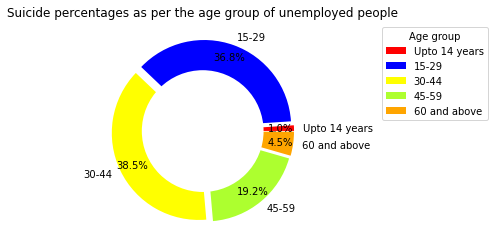

In [47]:
# Setting labels for items in Chart
Age_group = ['Upto 14 years', '15-29', '30-44',
            '45-59', '60 and above']
  
# Setting size in Chart based on 
# given values
suicide_count = [upto_14_years,between_15_29,between_30_44,between_45_59 ,above_60]

labels = Age_group
  
# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(suicide_count, colors=colors, labels=Age_group,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Suicide percentages as per the age group of unemployed people')

# Add Legends
plt.legend(labels,bbox_to_anchor=(1.30, 1), loc='upper left',title ="Age group")
  
# Displaing Chart
plt.show()


Quite evidently, unemployed people belonging to age group 30-44 committed the most number of suicides.

Breaking down the numbers by gender.

In [48]:
Male_upto_14_years = unemployment_data["Male upto 14 years"].sum() 
Female_upto_14_years = unemployment_data["Female upto 14 years"].sum()
Male_between_15_29 = unemployment_data["Male 15-29 years"].sum() 
Female_between_15_29 = unemployment_data["Female 15-29 years"].sum()
Male_between_30_44 = unemployment_data["Male 30-44 years"].sum()
Female_between_30_44 = unemployment_data["Female 30-44 years"].sum()
Male_between_45_59 = unemployment_data["Male 45-59 years"].sum() 
Female_between_45_59 = unemployment_data["Female 45-59 years"].sum()
Male_above_60 = unemployment_data["Male 60 years and above"].sum() 
Female_above_60 = unemployment_data["Female 60 years and above"].sum()


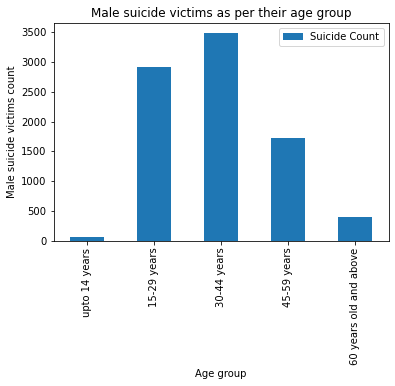

In [61]:
suicide_count = [Male_upto_14_years,Male_between_15_29,Male_between_30_44,Male_between_45_59 ,Male_above_60]


my_age_data = {'Age group':['upto 14 years', '15-29 years', '30-44 years', '45-59 years','60 years old and above'],
               'Suicide Count' : suicide_count
              }
 
# Create DataFrame
male_df = pd.DataFrame(my_age_data)


male_df.plot(x ='Age group', y='Suicide Count', kind = 'bar')
plt.ylabel("Male suicide victims count")
plt.xlabel("Age group")
plt.title("Male suicide victims as per their age group")
plt.show()

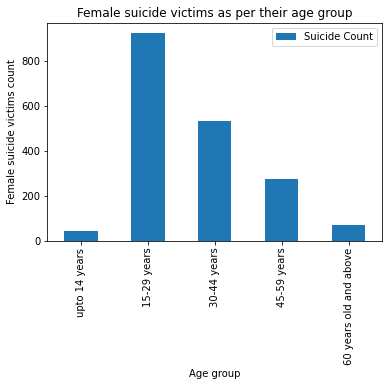

In [59]:
suicide_count = [Female_upto_14_years,Female_between_15_29,Female_between_30_44,Female_between_45_59 ,Female_above_60]


my_age_data = {'Age group':['upto 14 years', '15-29 years', '30-44 years', '45-59 years','60 years old and above'],
               'Suicide Count' : suicide_count
              }
 
# Create DataFrame
female_df = pd.DataFrame(my_age_data)


female_df.plot(x ='Age group', y='Suicide Count', kind = 'bar')
plt.ylabel("Female suicide victims count")
plt.xlabel("Age group")
plt.title("Female suicide victims as per their age group")
plt.show()

Observing the above plotted barcharts, it can concluded that where unemployed men within age group 30-44 years committed the most suicides, majority of unemployed women on the other hand, who ended their lives fell in the category of 15-29 years.